In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
###Using a trip advisor dataset from internet, about hotel in las vegas from 2015, used in a journey artitle
###The case of Las Vegas Corp

### https://archive.ics.uci.edu/ml/index.php

####https://archive.ics.uci.edu/ml/datasets/Las+Vegas+Strip#

In [4]:
Vegas = pd.read_csv('vegas.csv')

In [5]:
Vegas.head()
### Data set is not super friendly, we have some odd names

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,9.0,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,3.0,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,2.0,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,Europe,6.0,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,7.0,March,Tuesday


In [6]:
Vegas.columns

Index(['User country', 'Nr. reviews', 'Nr. hotel reviews', 'Helpful votes',
       'Score', 'Period of stay', 'Traveler type', 'Pool', 'Gym',
       'Tennis court', 'Spa', 'Casino', 'Free internet', 'Hotel name',
       'Hotel stars', 'Nr. rooms', 'User continent', 'Member years',
       'Review month', 'Review weekday'],
      dtype='object')

In [7]:
### rename columns to something makes more sense
### leverage regular expression, replace all . with underscore - we will talk about regular expression in later lectures
Vegas.columns.str.replace('\.*\s', '_').str.lower()

Index(['user_country', 'nr_reviews', 'nr_hotel_reviews', 'helpful_votes',
       'score', 'period_of_stay', 'traveler_type', 'pool', 'gym',
       'tennis_court', 'spa', 'casino', 'free_internet', 'hotel_name',
       'hotel_stars', 'nr_rooms', 'user_continent', 'member_years',
       'review_month', 'review_weekday'],
      dtype='object')

In [8]:
Vegas.columns = Vegas.columns.str.replace('\.*\s', '_').str.lower()

In [9]:
Vegas

,user_country,nr_reviews,nr_hotel_reviews,helpful_votes,score,period_of_stay,traveler_type,pool,gym,tennis_court,spa,casino,free_internet,hotel_name,hotel_stars,nr_rooms,user_continent,member_years,review_month,review_weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,9.0,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,3.0,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,2.0,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,Europe,6.0,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,7.0,March,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,UK,15,4,8,5,Sep-Nov,Couples,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826.0,Europe,1.0,October,Sunday
500,Canada,50,13,29,4,Sep-Nov,Couples,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826.0,North America,8.0,November,Thursday
501,USA,154,23,31,4,Sep-Nov,Friends,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826.0,North America,4.0,November,Thursday
502,USA,9,6,5,2,Dec-Feb,Families,YES,YES,NO,YES,YES,YES,The Westin las Vegas Hotel Casino & Spa,4,826.0,North America,9.0,December,Wednesday


In [13]:
#### let's do our analytics by hotel name
### The object is very abstract, what does it mean....makes more sense when you do some example
score_by_hotel = Vegas['score'].groupby(Vegas.hotel_name)
score_by_hotel

In [14]:
### We see 24 values, with sample scores
score_by_hotel.get_group('Circus Circus Hotel & Casino Las Vegas')

0     5
1     3
2     5
3     4
4     4
5     3
6     4
7     4
8     4
9     3
10    2
11    3
12    2
13    3
14    3
15    4
16    1
17    4
18    3
19    2
20    4
21    1
22    4
23    2
Name: score, dtype: int64

In [15]:
### mean score of each hotel
score_by_hotel.mean().sort_values()

hotel_name
Circus Circus Hotel & Casino Las Vegas                 3.208333
Monte Carlo Resort&Casino                              3.291667
Excalibur Hotel & Casino                               3.708333
The Westin las Vegas Hotel Casino & Spa                3.916667
Hilton Grand Vacations at the Flamingo                 3.958333
Treasure Island- TI Hotel & Casino                     3.958333
Tropicana Las Vegas - A Double Tree by Hilton Hotel    4.041667
Paris Las Vegas                                        4.041667
The Cromwell                                           4.083333
Caesars Palace                                         4.125000
Hilton Grand Vacations on the Boulevard                4.166667
Bellagio Las Vegas                                     4.208333
Tuscany Las Vegas Suites & Casino                      4.208333
The Cosmopolitan Las Vegas                             4.250000
The Palazzo Resort Hotel Casino                        4.375000
Wyndham Grand Desert         

In [17]:
###min score of each hotel
score_by_hotel.min()

hotel_name
Bellagio Las Vegas                                     2
Caesars Palace                                         1
Circus Circus Hotel & Casino Las Vegas                 1
Encore at wynn Las Vegas                               1
Excalibur Hotel & Casino                               2
Hilton Grand Vacations at the Flamingo                 2
Hilton Grand Vacations on the Boulevard                1
Marriott's Grand Chateau                               3
Monte Carlo Resort&Casino                              1
Paris Las Vegas                                        2
The Cosmopolitan Las Vegas                             1
The Cromwell                                           1
The Palazzo Resort Hotel Casino                        3
The Venetian Las Vegas Hotel                           3
The Westin las Vegas Hotel Casino & Spa                2
Treasure Island- TI Hotel & Casino                     3
Tropicana Las Vegas - A Double Tree by Hilton Hotel    1
Trump International 

In [18]:
####sample size of each hotel, we have same samples for each hotel
### this is good because that weight of each hotel is the same
score_by_hotel.size()

hotel_name
Bellagio Las Vegas                                     24
Caesars Palace                                         24
Circus Circus Hotel & Casino Las Vegas                 24
Encore at wynn Las Vegas                               24
Excalibur Hotel & Casino                               24
Hilton Grand Vacations at the Flamingo                 24
Hilton Grand Vacations on the Boulevard                24
Marriott's Grand Chateau                               24
Monte Carlo Resort&Casino                              24
Paris Las Vegas                                        24
The Cosmopolitan Las Vegas                             24
The Cromwell                                           24
The Palazzo Resort Hotel Casino                        24
The Venetian Las Vegas Hotel                           24
The Westin las Vegas Hotel Casino & Spa                24
Treasure Island- TI Hotel & Casino                     24
Tropicana Las Vegas - A Double Tree by Hilton Hotel    24
Tru

In [19]:
#### we can also group by multiple items
by_trav_pool = Vegas['score'].groupby([Vegas.traveler_type, Vegas.pool])

In [23]:
### we grouped two, so returns a hierachy of items
by_trav_pool.mean()

traveler_type  pool
Business       NO      3.000000
               YES     3.890411
Couples        NO      2.714286
               YES     4.285024
Families       NO      3.375000
               YES     4.068627
Friends        NO      3.428571
               YES     4.333333
Solo           NO      4.000000
               YES     3.913043
Name: score, dtype: float64

In [24]:
####make it into data frame
by_trav_pool.mean().unstack()

pool,NO,YES
traveler_type,,
Business,3.000000,3.890411
Couples,2.714286,4.285024
Families,3.375000,4.068627
Friends,3.428571,4.333333
Solo,4.000000,3.913043


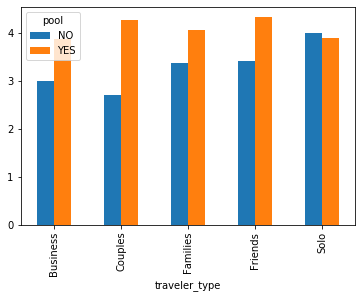

In [25]:
###we can plot that
### what can we tell from the chart?
by_trav_pool.mean().unstack().plot(kind='bar')

In [26]:
by_hotel = Vegas.groupby('hotel_name')

In [27]:
### get the first item from the table
by_hotel.get_group(Vegas.hotel_name[0])

,user_country,nr_reviews,nr_hotel_reviews,helpful_votes,score,period_of_stay,traveler_type,pool,gym,tennis_court,spa,casino,free_internet,hotel_name,hotel_stars,nr_rooms,user_continent,member_years,review_month,review_weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,9.0,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,3.0,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,2.0,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,Europe,6.0,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,7.0,March,Tuesday
5,Canada,31,8,27,3,Mar-May,Couples,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,2.0,March,Tuesday
6,UK,45,12,46,4,Mar-May,Couples,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,Europe,4.0,April,Friday
7,USA,2,1,4,4,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,0.0,April,Tuesday
8,India,24,3,8,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,Asia,3.0,May,Saturday
9,Canada,12,7,11,3,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,5.0,May,Tuesday


In [28]:
by_hotel.mean()
### we get mean for everything that's a number.....we lost a lot of columns that are not numbers, they get auto dropped

,nr_reviews,nr_hotel_reviews,helpful_votes,score,hotel_stars,nr_rooms,member_years
hotel_name,,,,,,,
Bellagio Las Vegas,27.708333,10.208333,24.875000,4.208333,5.0,3933.0,3.416667
Caesars Palace,38.000000,15.291667,26.375000,4.125000,5.0,3348.0,4.750000
Circus Circus Hotel & Casino Las Vegas,29.208333,7.791667,18.500000,3.208333,3.0,3773.0,3.833333
Encore at wynn Las Vegas,57.166667,16.333333,36.750000,4.541667,5.0,2034.0,4.750000
Excalibur Hotel & Casino,45.583333,22.125000,31.750000,3.708333,3.0,3981.0,4.500000
Hilton Grand Vacations at the Flamingo,48.416667,23.041667,32.458333,3.958333,3.0,315.0,3.958333
Hilton Grand Vacations on the Boulevard,36.916667,15.541667,20.833333,4.166667,3.0,NaN,NaN
Marriott's Grand Chateau,90.041667,30.416667,57.333333,4.541667,3.0,NaN,NaN
Monte Carlo Resort&Casino,71.833333,17.458333,39.250000,3.291667,4.0,3003.0,3.583333


In [29]:
### we get multi layer index
#### some number make sense, member_years, but some don't make sense  nr_rooms
Vegas.groupby(['traveler_type', 'pool']).mean()

nr_reviews  nr_hotel_reviews  helpful_votes     score  \
traveler_type pool                                                          
Business      NO    119.000000         21.000000      75.000000  3.000000   
              YES    71.356164         23.712329      41.821918  3.890411   
Couples       NO     20.428571          6.857143      18.000000  2.714286   
              YES    46.536232         15.062802      32.579710  4.285024   
Families      NO     41.625000          9.500000      20.000000  3.375000   
              YES    45.382353         14.696078      26.666667  4.068627   
Friends       NO     14.428571          5.285714      11.571429  3.428571   
              YES    42.013333         15.386667      31.133333  4.333333   
Solo          NO      5.000000          5.000000       2.000000  4.000000   
              YES    40.652174         16.826087      30.739130  3.913043   

                    hotel_stars     nr_rooms  member_years  
traveler_type pool                                          
Business      NO       3.000000  3773.000000      3.000000  
              YES      4.068493  2262.655172      3.896552  
Couples       NO       3.000000  3773.000000      4.714286  
              YES      4.149758  2561.238372      4.459302  
Families      NO       3.000000  3773.000000      3.000000  
              YES      4.029412  2372.520548      4.356164  
Friends       NO       3.000000  3773.000000      3.571429  
              YES      4.093333  2445.000000      4.475410  
Solo          NO       3.000000  3773.000000      7.000000  
              YES      4.086957  2593.900000    -85.200000

In [30]:
### only need score and member years
Vegas.groupby(['traveler_type', 'pool'])['score','member_years'].mean()

score  member_years
traveler_type pool                        
Business      NO    3.000000      3.000000
              YES   3.890411      3.896552
Couples       NO    2.714286      4.714286
              YES   4.285024      4.459302
Families      NO    3.375000      3.000000
              YES   4.068627      4.356164
Friends       NO    3.428571      3.571429
              YES   4.333333      4.475410
Solo          NO    4.000000      7.000000
              YES   3.913043    -85.200000

In [31]:
####What if we leverage relationship between index and rows
Vegas.set_index('hotel_name').head()

,user_country,nr_reviews,nr_hotel_reviews,helpful_votes,score,period_of_stay,traveler_type,pool,gym,tennis_court,spa,casino,free_internet,hotel_stars,nr_rooms,user_continent,member_years,review_month,review_weekday
hotel_name,,,,,,,,,,,,,,,,,,,
Circus Circus Hotel & Casino Las Vegas,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,3,3773.0,North America,9.0,January,Thursday
Circus Circus Hotel & Casino Las Vegas,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,3,3773.0,North America,3.0,January,Friday
Circus Circus Hotel & Casino Las Vegas,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,3,3773.0,North America,2.0,February,Saturday
Circus Circus Hotel & Casino Las Vegas,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,3,3773.0,Europe,6.0,February,Friday
Circus Circus Hotel & Casino Las Vegas,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,3,3773.0,North America,7.0,March,Tuesday


In [32]:
def f(name):
    if 'Circus' in name or 'Flamingo' in name:
        return 'preferred'
    else:
        return 'non-preferred'

In [33]:
#### we can also group by function
Vegas.set_index('hotel_name').groupby(f)

In [34]:
Vegas.set_index('hotel_name').groupby(f).mean()

,nr_reviews,nr_hotel_reviews,helpful_votes,score,hotel_stars,nr_rooms,member_years
non-preferred,49.111842,16.087719,32.412281,4.179825,4.157895,2606.733333,-0.597222
preferred,38.812500,15.416667,25.479167,3.583333,3.000000,2044.000000,3.895833


# Aggregation

In [35]:
### aggregation: array -> Scalar value

In [36]:
####count, sum, mean, median, std, var, min, max, prod, first, last 

In [20]:
Vegas = pd.read_csv('vegas.csv')
Vegas.columns = Vegas.columns.str.replace('\.*\s', '_').str.lower()

In [21]:

by_hotel = Vegas.groupby('hotel_name')

In [22]:
by_hotel['score'].median() ### find the median

hotel_name
Bellagio Las Vegas                                     4.5
Caesars Palace                                         4.5
Circus Circus Hotel & Casino Las Vegas                 3.0
Encore at wynn Las Vegas                               5.0
Excalibur Hotel & Casino                               4.0
Hilton Grand Vacations at the Flamingo                 4.0
Hilton Grand Vacations on the Boulevard                4.5
Marriott's Grand Chateau                               5.0
Monte Carlo Resort&Casino                              3.5
Paris Las Vegas                                        4.0
The Cosmopolitan Las Vegas                             5.0
The Cromwell                                           4.5
The Palazzo Resort Hotel Casino                        5.0
The Venetian Las Vegas Hotel                           5.0
The Westin las Vegas Hotel Casino & Spa                4.0
Treasure Island- TI Hotel & Casino                     4.0
Tropicana Las Vegas - A Double Tree by Hilton

In [23]:
####we can also aggregate by functions we write

###what if we want the range, max - min

def my_range(col):
    return np.max(col)-np.min(col)


In [43]:
by_hotel['score'].agg(my_range)

### difference between min and max

hotel_name
Bellagio Las Vegas                                     3
Caesars Palace                                         4
Circus Circus Hotel & Casino Las Vegas                 4
Encore at wynn Las Vegas                               4
Excalibur Hotel & Casino                               3
Hilton Grand Vacations at the Flamingo                 3
Hilton Grand Vacations on the Boulevard                4
Marriott's Grand Chateau                               2
Monte Carlo Resort&Casino                              4
Paris Las Vegas                                        3
The Cosmopolitan Las Vegas                             4
The Cromwell                                           4
The Palazzo Resort Hotel Casino                        2
The Venetian Las Vegas Hotel                           2
The Westin las Vegas Hotel Casino & Spa                3
Treasure Island- TI Hotel & Casino                     2
Tropicana Las Vegas - A Double Tree by Hilton Hotel    4
Trump International 

In [24]:
#### since describe is a series function, I can do that with describe on group by as well
Vegas.score.groupby(Vegas.pool).describe()

,count,mean,std,min,25%,50%,75%,max
pool,,,,,,,,
NO,24.0,3.208333,1.102533,1.0,2.75,3.0,4.0,5.0
YES,480.0,4.168750,0.981383,1.0,4.00,4.0,5.0,5.0


In [45]:
##### what if we want to aggregate with multiple functions


In [25]:
### we can aggregate by multiple stuff
by_hotel['score'].agg(['mean', my_range, lambda x: x.mean() > 4])
####three columns are created, name of the function becomes name of column

,mean,my_range,<lambda_0>
hotel_name,,,
Bellagio Las Vegas,4.208333,3,True
Caesars Palace,4.125000,4,True
Circus Circus Hotel & Casino Las Vegas,3.208333,4,False
Encore at wynn Las Vegas,4.541667,4,True
Excalibur Hotel & Casino,3.708333,3,False
Hilton Grand Vacations at the Flamingo,3.958333,3,False
Hilton Grand Vacations on the Boulevard,4.166667,4,True
Marriott's Grand Chateau,4.541667,2,True
Monte Carlo Resort&Casino,3.291667,4,False


In [26]:
####apply to apply multiple aggregation to multiple columns
by_hotel[['score', 'member_years']].agg(['mean', my_range])
### we get all combinations for the 2 columns and 2 functions

score           \
                                                        mean my_range   
hotel_name                                                              
Bellagio Las Vegas                                  4.208333        3   
Caesars Palace                                      4.125000        4   
Circus Circus Hotel & Casino Las Vegas              3.208333        4   
Encore at wynn Las Vegas                            4.541667        4   
Excalibur Hotel & Casino                            3.708333        3   
Hilton Grand Vacations at the Flamingo              3.958333        3   
Hilton Grand Vacations on the Boulevard             4.166667        4   
Marriott's Grand Chateau                            4.541667        2   
Monte Carlo Resort&Casino                           3.291667        4   
Paris Las Vegas                                     4.041667        3   
The Cosmopolitan Las Vegas                          4.250000        4   
The Cromwell                                        4.083333        4   
The Palazzo Resort Hotel Casino                     4.375000        2   
The Venetian Las Vegas Hotel                        4.583333        2   
The Westin las Vegas Hotel Casino & Spa             3.916667        3   
Treasure Island- TI Hotel & Casino                  3.958333        2   
Tropicana Las Vegas - A Double Tree by Hilton H...  4.041667        4   
Trump International Hotel Las Vegas                 4.375000        4   
Tuscany Las Vegas Suites & Casino                   4.208333        3   
Wyndham Grand Desert                                4.375000        2   
Wynn Las Vegas                                      4.625000        3   

                                                   member_years           
                                                           mean my_range  
hotel_name                                                                
Bellagio Las Vegas                                     3.416667     10.0  
Caesars Palace                                         4.750000     13.0  
Circus Circus Hotel & Casino Las Vegas                 3.833333     10.0  
Encore at wynn Las Vegas                               4.750000      9.0  
Excalibur Hotel & Casino                               4.500000     11.0  
Hilton Grand Vacations at the Flamingo                 3.958333     10.0  
Hilton Grand Vacations on the Boulevard                     NaN      NaN  
Marriott's Grand Chateau                                    NaN      NaN  
Monte Carlo Resort&Casino                              3.583333      9.0  
Paris Las Vegas                                        3.625000      9.0  
The Cosmopolitan Las Vegas                             4.500000     10.0  
The Cromwell                                                NaN      NaN  
The Palazzo Resort Hotel Casino                        5.291667     10.0  
The Venetian Las Vegas Hotel                           4.375000     10.0  
The Westin las Vegas Hotel Casino & Spa                5.750000     11.0  
Treasure Island- TI Hotel & Casino                   -71.041667   1818.0  
Tropicana Las Vegas - A Double Tree by Hilton H...     3.083333     10.0  
Trump International Hotel Las Vegas                    4.333333     11.0  
Tuscany Las Vegas Suites & Casino                      4.708333      8.0  
Wyndham Grand Desert                                        NaN      NaN  
Wynn Las Vegas                                         5.416667     10.0

In [27]:
#### in many cases, we only want one type of 
#### for score, we need mean, for country, we want to know whether they are from USA
func_dict = {'score': 'mean', 'user_country': lambda x: (x != 'USA').mean()}

In [28]:
#### we do different calculation for different fields
hotel_df = by_hotel.agg(func_dict)
hotel_df

,score,user_country
hotel_name,,
Bellagio Las Vegas,4.208333,0.666667
Caesars Palace,4.125000,0.416667
Circus Circus Hotel & Casino Las Vegas,3.208333,0.583333
Encore at wynn Las Vegas,4.541667,0.416667
Excalibur Hotel & Casino,3.708333,0.750000
Hilton Grand Vacations at the Flamingo,3.958333,0.500000
Hilton Grand Vacations on the Boulevard,4.166667,0.583333
Marriott's Grand Chateau,4.541667,0.666667
Monte Carlo Resort&Casino,3.291667,0.750000


In [29]:
by_hotel.get_group('Circus Circus Hotel & Casino Las Vegas')['pool']
### as we can see, a hotel either has pool or doesn't have pool

0     NO
1     NO
2     NO
3     NO
4     NO
5     NO
6     NO
7     NO
8     NO
9     NO
10    NO
11    NO
12    NO
13    NO
14    NO
15    NO
16    NO
17    NO
18    NO
19    NO
20    NO
21    NO
22    NO
23    NO
Name: pool, dtype: object

In [30]:
## a hotel either has pool or not have pool, so these values should stay the same.
by_hotel['pool'].first()

hotel_name
Bellagio Las Vegas                                     YES
Caesars Palace                                         YES
Circus Circus Hotel & Casino Las Vegas                  NO
Encore at wynn Las Vegas                               YES
Excalibur Hotel & Casino                               YES
Hilton Grand Vacations at the Flamingo                 YES
Hilton Grand Vacations on the Boulevard                YES
Marriott's Grand Chateau                               YES
Monte Carlo Resort&Casino                              YES
Paris Las Vegas                                        YES
The Cosmopolitan Las Vegas                             YES
The Cromwell                                           YES
The Palazzo Resort Hotel Casino                        YES
The Venetian Las Vegas Hotel                           YES
The Westin las Vegas Hotel Casino & Spa                YES
Treasure Island- TI Hotel & Casino                     YES
Tropicana Las Vegas - A Double Tree by Hilton

In [31]:
### re-write func_dict to include all columns that would be the same for the hotel
func_dict = {'score': 'mean', 
             'user_country': lambda x: (x != 'USA').mean(),
             'pool': 'first',
             'gym': 'first',
             'tennis_court': 'first',
             'spa': 'first',
             'casino': 'first',
             'free_internet': 'first',
             'hotel_stars': 'first',
             'nr_rooms': 'first'
            }

In [32]:
#### re-run all functions
hotel_df = by_hotel.agg(func_dict)
hotel_df

,score,user_country,pool,gym,tennis_court,spa,casino,free_internet,hotel_stars,nr_rooms
hotel_name,,,,,,,,,,
Bellagio Las Vegas,4.208333,0.666667,YES,YES,NO,YES,YES,YES,5,3933.0
Caesars Palace,4.125000,0.416667,YES,YES,NO,YES,YES,YES,5,3348.0
Circus Circus Hotel & Casino Las Vegas,3.208333,0.583333,NO,YES,NO,NO,YES,YES,3,3773.0
Encore at wynn Las Vegas,4.541667,0.416667,YES,YES,NO,YES,YES,YES,5,2034.0
Excalibur Hotel & Casino,3.708333,0.750000,YES,YES,NO,YES,YES,YES,3,3981.0
Hilton Grand Vacations at the Flamingo,3.958333,0.500000,YES,YES,NO,NO,NO,YES,3,315.0
Hilton Grand Vacations on the Boulevard,4.166667,0.583333,YES,YES,NO,YES,YES,YES,3,NaN
Marriott's Grand Chateau,4.541667,0.666667,YES,YES,NO,NO,YES,YES,3,NaN
Monte Carlo Resort&Casino,3.291667,0.750000,YES,YES,NO,YES,YES,NO,4,3003.0


In [33]:
### fix column name
hotel_df.columns = ['mean_score', 'precent_non_USA'] + list(hotel_df.columns[2:])
hotel_df

,mean_score,precent_non_USA,pool,gym,tennis_court,spa,casino,free_internet,hotel_stars,nr_rooms
hotel_name,,,,,,,,,,
Bellagio Las Vegas,4.208333,0.666667,YES,YES,NO,YES,YES,YES,5,3933.0
Caesars Palace,4.125000,0.416667,YES,YES,NO,YES,YES,YES,5,3348.0
Circus Circus Hotel & Casino Las Vegas,3.208333,0.583333,NO,YES,NO,NO,YES,YES,3,3773.0
Encore at wynn Las Vegas,4.541667,0.416667,YES,YES,NO,YES,YES,YES,5,2034.0
Excalibur Hotel & Casino,3.708333,0.750000,YES,YES,NO,YES,YES,YES,3,3981.0
Hilton Grand Vacations at the Flamingo,3.958333,0.500000,YES,YES,NO,NO,NO,YES,3,315.0
Hilton Grand Vacations on the Boulevard,4.166667,0.583333,YES,YES,NO,YES,YES,YES,3,NaN
Marriott's Grand Chateau,4.541667,0.666667,YES,YES,NO,NO,YES,YES,3,NaN
Monte Carlo Resort&Casino,3.291667,0.750000,YES,YES,NO,YES,YES,NO,4,3003.0


In [34]:
hotel_df.to_csv('hotel.csv')

# Pivot Table

In [5]:
h = pd.read_csv('hotel.csv', index_col = 'hotel_name')
h.head()

,mean_score,precent_non_USA,pool,gym,tennis_court,spa,casino,free_internet,hotel_stars,nr_rooms
hotel_name,,,,,,,,,,
Bellagio Las Vegas,4.208333,0.666667,YES,YES,NO,YES,YES,YES,5,3933.0
Caesars Palace,4.125000,0.416667,YES,YES,NO,YES,YES,YES,5,3348.0
Circus Circus Hotel & Casino Las Vegas,3.208333,0.583333,NO,YES,NO,NO,YES,YES,3,3773.0
Encore at wynn Las Vegas,4.541667,0.416667,YES,YES,NO,YES,YES,YES,5,2034.0
Excalibur Hotel & Casino,3.708333,0.750000,YES,YES,NO,YES,YES,YES,3,3981.0


In [7]:
### if we watn to know the mean score for hotels with or without tennis court/spa, what is mean score
h.pivot_table(values = 'mean_score', index = 'tennis_court', columns = 'spa')

spa,NO,YES
tennis_court,,
NO,3.947917,4.131944
YES,4.375000,4.208333


In [9]:
## we may also do multiple columns, and rows
h.pivot_table(values = 'mean_score', index = ['tennis_court', 'pool'], columns = ['spa', 'hotel_stars'])

spa                      NO                 YES               
hotel_stars               3         4         3     4        5
tennis_court pool                                             
NO           NO    3.208333       NaN       NaN   NaN      NaN
             YES   4.250000  4.083333  3.937500  3.75  4.35119
YES          YES   4.375000       NaN  4.208333  4.00  4.62500

In [10]:
## we can do margins True to have overall sum
h.pivot_table(values = 'mean_score', index = ['tennis_court', 'pool'], columns = ['spa', 'hotel_stars'], margins = True)

spa                      NO                 YES                       All
hotel_stars               3         4         3     4         5          
tennis_court pool                                                        
NO           NO    3.208333       NaN       NaN   NaN       NaN  3.208333
             YES   4.250000  4.083333  3.937500  3.75  4.351190  4.144444
YES          YES   4.375000       NaN  4.208333  4.00  4.625000  4.241667
All                4.020833  4.083333  4.027778  3.85  4.385417  4.123016

In [11]:
### by default, pivot table calculates average
### we can do different functions, in this case, we use min
h.pivot_table(values = 'mean_score', index = ['tennis_court', 'pool'], columns = ['spa', 'hotel_stars'], aggfunc = min)

spa                      NO                 YES                 
hotel_stars               3         4         3         4      5
tennis_court pool                                               
NO           NO    3.208333       NaN       NaN       NaN    NaN
             YES   3.958333  4.083333  3.708333  3.291667  4.125
YES          YES   4.375000       NaN  4.208333  3.958333  4.625

In [14]:
### by default, pivot table calculates average
### we can do different functions, in this case, we use min
h.pivot_table(values = 'mean_score', index = ['tennis_court'], columns = ['spa', 'hotel_stars'], aggfunc = 'count')

spa            NO       YES          
hotel_stars     3    4    3    4    5
tennis_court                         
NO            3.0  1.0  2.0  3.0  7.0
YES           1.0  NaN  1.0  2.0  1.0

In [16]:
### we may also use cross tab
pd.crosstab(h.tennis_court, h.spa)

spa,NO,YES
tennis_court,,
NO,4,12
YES,1,4
